## Is the dataset provided by Packard- Hewlett fake?

I have a creeping suspicion that the dataset is fake and my boss just wants to test my data engineering skills as a new employee. To confirm my hunch, i decide to run a few statistics and generate a visualization of the data, with which to confront the boss.

#### Conclusion

An analysis of the bar graph showed that there was very little difference in what an Assistant Engineer, Senior Engineer, Engineer and a Technique Leader earned. This is highly unusual if the titles suggest a level of seniority.

It also goes against normal convention that an employee does not get a pay raise when they get promoted!

Based on the analysis, and the fact that my first name and last name in the database showed my full name as April Foolsday, i conclude that the Boss was indeed testing my data engineering skills.

<b> <font color = green> I am confident i passed the test with flying colors !!!


In [1]:
# Dependencies
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
# config.py file contains user and password info
from config import username, password, host, port 

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# connect to local database
engine = create_engine(f"postgresql://{username}:{password}@{host}:{port}/HP_Employee_DB")
conn = engine.connect()


In [3]:
# review tables in the HP_Employee_DB database
engine.table_names()

['departments', 'dept_emp', 'employees', 'salaries', 'titles', 'dept_manager']

In [4]:
# Query Records FROM the salaries table
data = pd.read_sql("SELECT * FROM salaries LIMIT 10", conn)
data

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12
5,10006,40000,1990-08-05,1991-08-05
6,10007,56724,1989-02-10,1990-02-10
7,10008,46671,1998-03-11,1999-03-11
8,10009,60929,1985-02-18,1986-02-18
9,10010,72488,1996-11-24,1997-11-24


In [5]:
# statistical summary
data.describe()

,emp_no,salary
count,10.00000,10.000000
mean,10005.50000,56104.500000
std,3.02765,13973.389824
min,10001.00000,40000.000000
25%,10003.25000,41708.250000
50%,10005.50000,58420.500000
75%,10007.75000,64603.250000
max,10010.00000,78228.000000


In [6]:
#Import the SQL database into Pandas.
salary_df = pd.read_sql_query("\
select * from salaries s \
inner join employees e on e.emp_no = s.emp_no \
inner join titles t on t.emp_no = e.emp_no",conn)

In [7]:
salary_df.head()

,emp_no,salary,from_date,to_date,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,title,from_date,to_date
0,10005,78228,1989-09-12,1990-09-12,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,10005,Senior Staff,1996-09-12,9999-01-01
1,10005,78228,1989-09-12,1990-09-12,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,10005,Staff,1989-09-12,1996-09-12
2,10010,72488,1996-11-24,1997-11-24,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24,10010,Engineer,1996-11-24,9999-01-01
3,10011,42365,1990-01-22,1991-01-22,10011,1953-11-07,Mary,Sluis,F,1990-01-22,10011,Staff,1990-01-22,1996-11-09
4,10013,40000,1985-10-20,1986-10-20,10013,1963-06-07,Eberhardt,Terkki,M,1985-10-20,10013,Senior Staff,1985-10-20,9999-01-01


In [8]:
# # statistical summary of employee salary
salary_df.describe().round(2)

,emp_no,salary,emp_no,emp_no
count,443308.00,443308.00,443308.00,443308.00
mean,253075.03,53023.81,253075.03,253075.03
std,161853.29,14337.90,161853.29,161853.29
min,10001.00,40000.00,10001.00,10001.00
25%,84855.75,40000.00,84855.75,84855.75
50%,249847.50,48746.00,249847.50,249847.50
75%,424891.25,61843.00,424891.25,424891.25
max,499999.00,129492.00,499999.00,499999.00


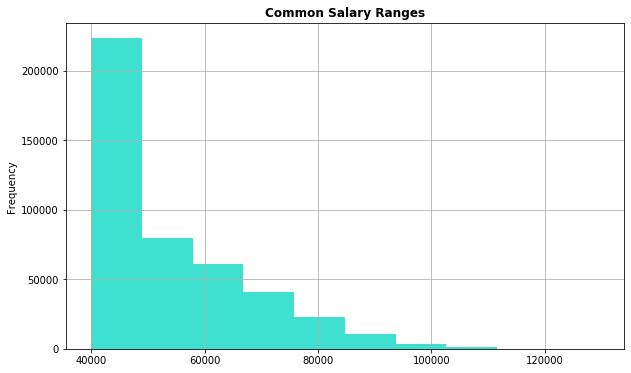

In [9]:
#Create a histogram to visualize the most common salary ranges for employees.

plt.title("Common Salary Ranges",fontdict={'fontweight':'bold', 'fontsize':12})

salary_df['salary'].plot.hist(grid=True,color = 'turquoise', figsize=(10, 6))

# Save the Figure
plt.savefig("Charts/Salaries.png")
plt.show()

####  What does the summary statistics tell us about the employee salaries at Packard- Hewlett?

The summary statistics shows the employee salary data is highly skewed to the Right, lowest salary being 40000.00 and highest 129492.00. 

The median salary is 48746.00 i.e.that is what the average employee at Packard- Hewlett earns.


In [10]:
# Create a bar chart of average salary by title

In [11]:
query = """
        SELECT t.emp_no, t.title, s.salary
        FROM employees AS e
        LEFT JOIN titles AS t
            ON e.emp_no = t.emp_no
        LEFT JOIN salaries AS s
            ON e.emp_no = s.emp_no
        
        """
title_df = pd.read_sql(query,conn)

In [12]:
title_df.head()

,emp_no,title,salary
0,10001,Senior Engineer,60117
1,10005,Senior Staff,78228
2,10005,Staff,78228
3,10010,Engineer,72488
4,10011,Staff,42365


In [13]:
# select all the unique titles we expect in our bar graph
pd.read_sql("SELECT DISTINCT title FROM titles ORDER BY title",conn)

,title
0,Assistant Engineer
1,Engineer
2,Manager
3,Senior Engineer
4,Senior Staff
5,Staff
6,Technique Leader


In [14]:
# group title_df by title
#from matplotlib import colors as mcolorsavg_salary
avg_salary = title_df.groupby("title").agg({"salary":"mean"}).round(2)

avg_salary.sort_values("salary", inplace=True)
avg_salary.head()

,salary
title,
Assistant Engineer,48493.20
Senior Engineer,48506.75
Engineer,48539.78
Technique Leader,48580.51
Manager,51531.04


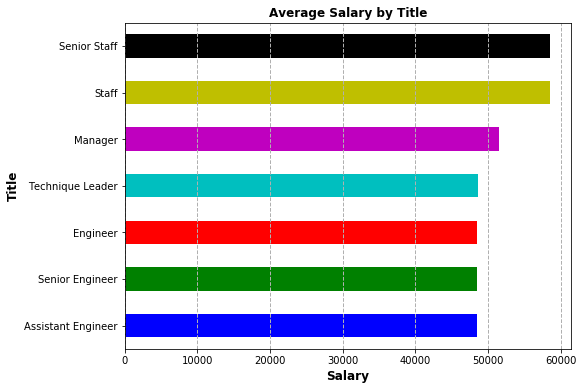

In [15]:
#plot a bar graph

ax = avg_salary['salary'].plot(kind='barh',figsize=(8, 6), color=['b', 'g', 'r', 'c', 'm', 'y', 'k'],legend=None)
ax.set_title("Average Salary by Title", fontdict={'fontweight':'bold', 'fontsize':12});
ax.set_xlabel("Salary",fontdict={'fontweight':'bold', 'fontsize':12});
ax.set_ylabel("Title",fontdict={'fontweight':'bold', 'fontsize':12});
ax.xaxis.grid(linestyle = '--', linewidth = 1)

# Save the Figure
plt.savefig("Charts/SalariesByTitle.png")
plt.show()

#### Observation

There is very little difference in what an Assistant Engineer, Senior Engineer, Engineer and a Technique Leader earns. This is highly unusual if the titles suggest a level of seniority, it goes against normal convention.
This would mean that employees dont get a pay raise when they get promoted!


###  My Boss's Parting shot "Search your ID number".
I look down at my badge to see that my employee ID number is 499942.
###  I check it out!

In [16]:
# i query the DB for my employee id!
salary_df.query('emp_no == 499942')

,emp_no,salary,from_date,to_date,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,title,from_date,to_date
55326,499942,40000,1998-03-28,1999-03-28,499942,1963-01-10,April,Foolsday,F,1997-02-10,499942,Technique Leader,1998-03-28,9999-01-01


In [17]:
title_df.query('emp_no == 499942')

,emp_no,title,salary
110780,499942,Technique Leader,40000


# ! oh snap! it is April Foolsday!

#### The boss was testing my data engineering skills. 
I passed with flying colors !!!!